In [182]:
%matplotlib inline

import matplotlib.pyplot as plt

import densityGC
import densityFG
import gcSampler
import numpy as np
import scipy
import triangle
import colorKDE

reload(densityGC)
reload(densityFG)
reload(gcSampler)

<module 'gcSampler' from 'gcSampler.pyc'>

In [183]:
data = np.loadtxt('n3115_phot_data.csv',delimiter=',')
colors = np.vstack((data[:,0],data[:,1])).T
coords = np.vstack((data[:,2],data[:,3])).T
data_in = (colors,coords)
sampler = gcSampler.gcSampler(30,catalog=data_in,max_rad = 0.25,\
                             radial_profile='exponential',fractions=np.array([0.1,0.15,.75]),fixed_cov=False,\
                             ellipticity=True,n_pop=2,n_source=2000,mock=False,mock_fg_only=True,\
                             spatial=np.array([0.02,0.85,0.81]))

In [184]:
colors.shape

(623, 2)

In [185]:
print sampler.theta_init

[ 0.1     0.15    1.03    0.3     0.009   0.0027  0.0042  0.75    0.19
  0.0082  0.0018  0.0031  0.02    0.85    0.81  ]


In [186]:
sampler.runSampler(5000,burn_steps=3000)

f_gc median,  16 %, and  84 %  0.104032192544    0.0937300727323    0.113788081808
f_gc_2 median,  16 %, and  84 %  0.158868038519    0.148140590051    0.170219873447
mu_gi_1 median,  16 %, and  84 %  1.05900512713    1.04795977328    1.06882240578
mu_ri_1 median,  16 %, and  84 %  0.309783509326    0.304206316116    0.314903932522
sig_gi_1 median,  16 %, and  84 %  0.00665015854864    0.00544483266653    0.00812289882566
sig_ri_1 median,  16 %, and  84 %  0.00188674799492    0.00153109429234    0.00233461922961
cov_1 median,  16 %, and  84 %  0.00307004851593    0.00244555664712    0.00386548198234
mu_gi_2 median,  16 %, and  84 %  0.761320070598    0.753359476918    0.769761585749
mu_ri_2 median,  16 %, and  84 %  0.18810963524    0.185060152279    0.191126379402
sig_gi_2 median,  16 %, and  84 %  0.00848188370532    0.00732964211255    0.00979026556643
sig_ri_2 median,  16 %, and  84 %  0.00154557151457    0.00137331679665    0.0017352342103
cov_2 median,  16 %, and  84 %  0.0029030

In [187]:
sampler.sampler.acceptance_fraction

array([ 0.346 ,  0.3444,  0.3468,  0.3576,  0.342 ,  0.3414,  0.3418,
        0.344 ,  0.348 ,  0.3572,  0.3344,  0.355 ,  0.3232,  0.336 ,
        0.3412,  0.3472,  0.3496,  0.3382,  0.347 ,  0.3458,  0.3456,
        0.3352,  0.3444,  0.332 ,  0.3528,  0.3326,  0.3372,  0.3516,
        0.3414,  0.3492])

Quantiles:
[(0.16, 0.093730072732252478), (0.5, 0.10403219254365664), (0.84, 0.1137880818075368)]
Quantiles:
[(0.16, 0.14814059005051813), (0.5, 0.15886803851864886), (0.84, 0.17021987344689279)]
Quantiles:
[(0.16, 1.0479597732754926), (0.5, 1.0590051271283414), (0.84, 1.0688224057805558)]
Quantiles:
[(0.16, 0.30420631611563093), (0.5, 0.30978350932604176), (0.84, 0.31490393252175219)]
Quantiles:
[(0.16, 0.0054448326665338343), (0.5, 0.0066501585486377184), (0.84, 0.0081228988256597055)]
Quantiles:
[(0.16, 0.0015310942923380769), (0.5, 0.0018867479949160335), (0.84, 0.0023346192296118786)]
Quantiles:
[(0.16, 0.0024455566471202738), (0.5, 0.0030700485159265043), (0.84, 0.0038654819823417605)]
Quantiles:
[(0.16, 0.75335947691837091), (0.5, 0.76132007059799522), (0.84, 0.76976158574902609)]
Quantiles:
[(0.16, 0.18506015227938272), (0.5, 0.18810963523973906), (0.84, 0.19112637940187469)]
Quantiles:
[(0.16, 0.0073296421125499962), (0.5, 0.0084818837053213334), (0.84, 0.009790265566432952)]


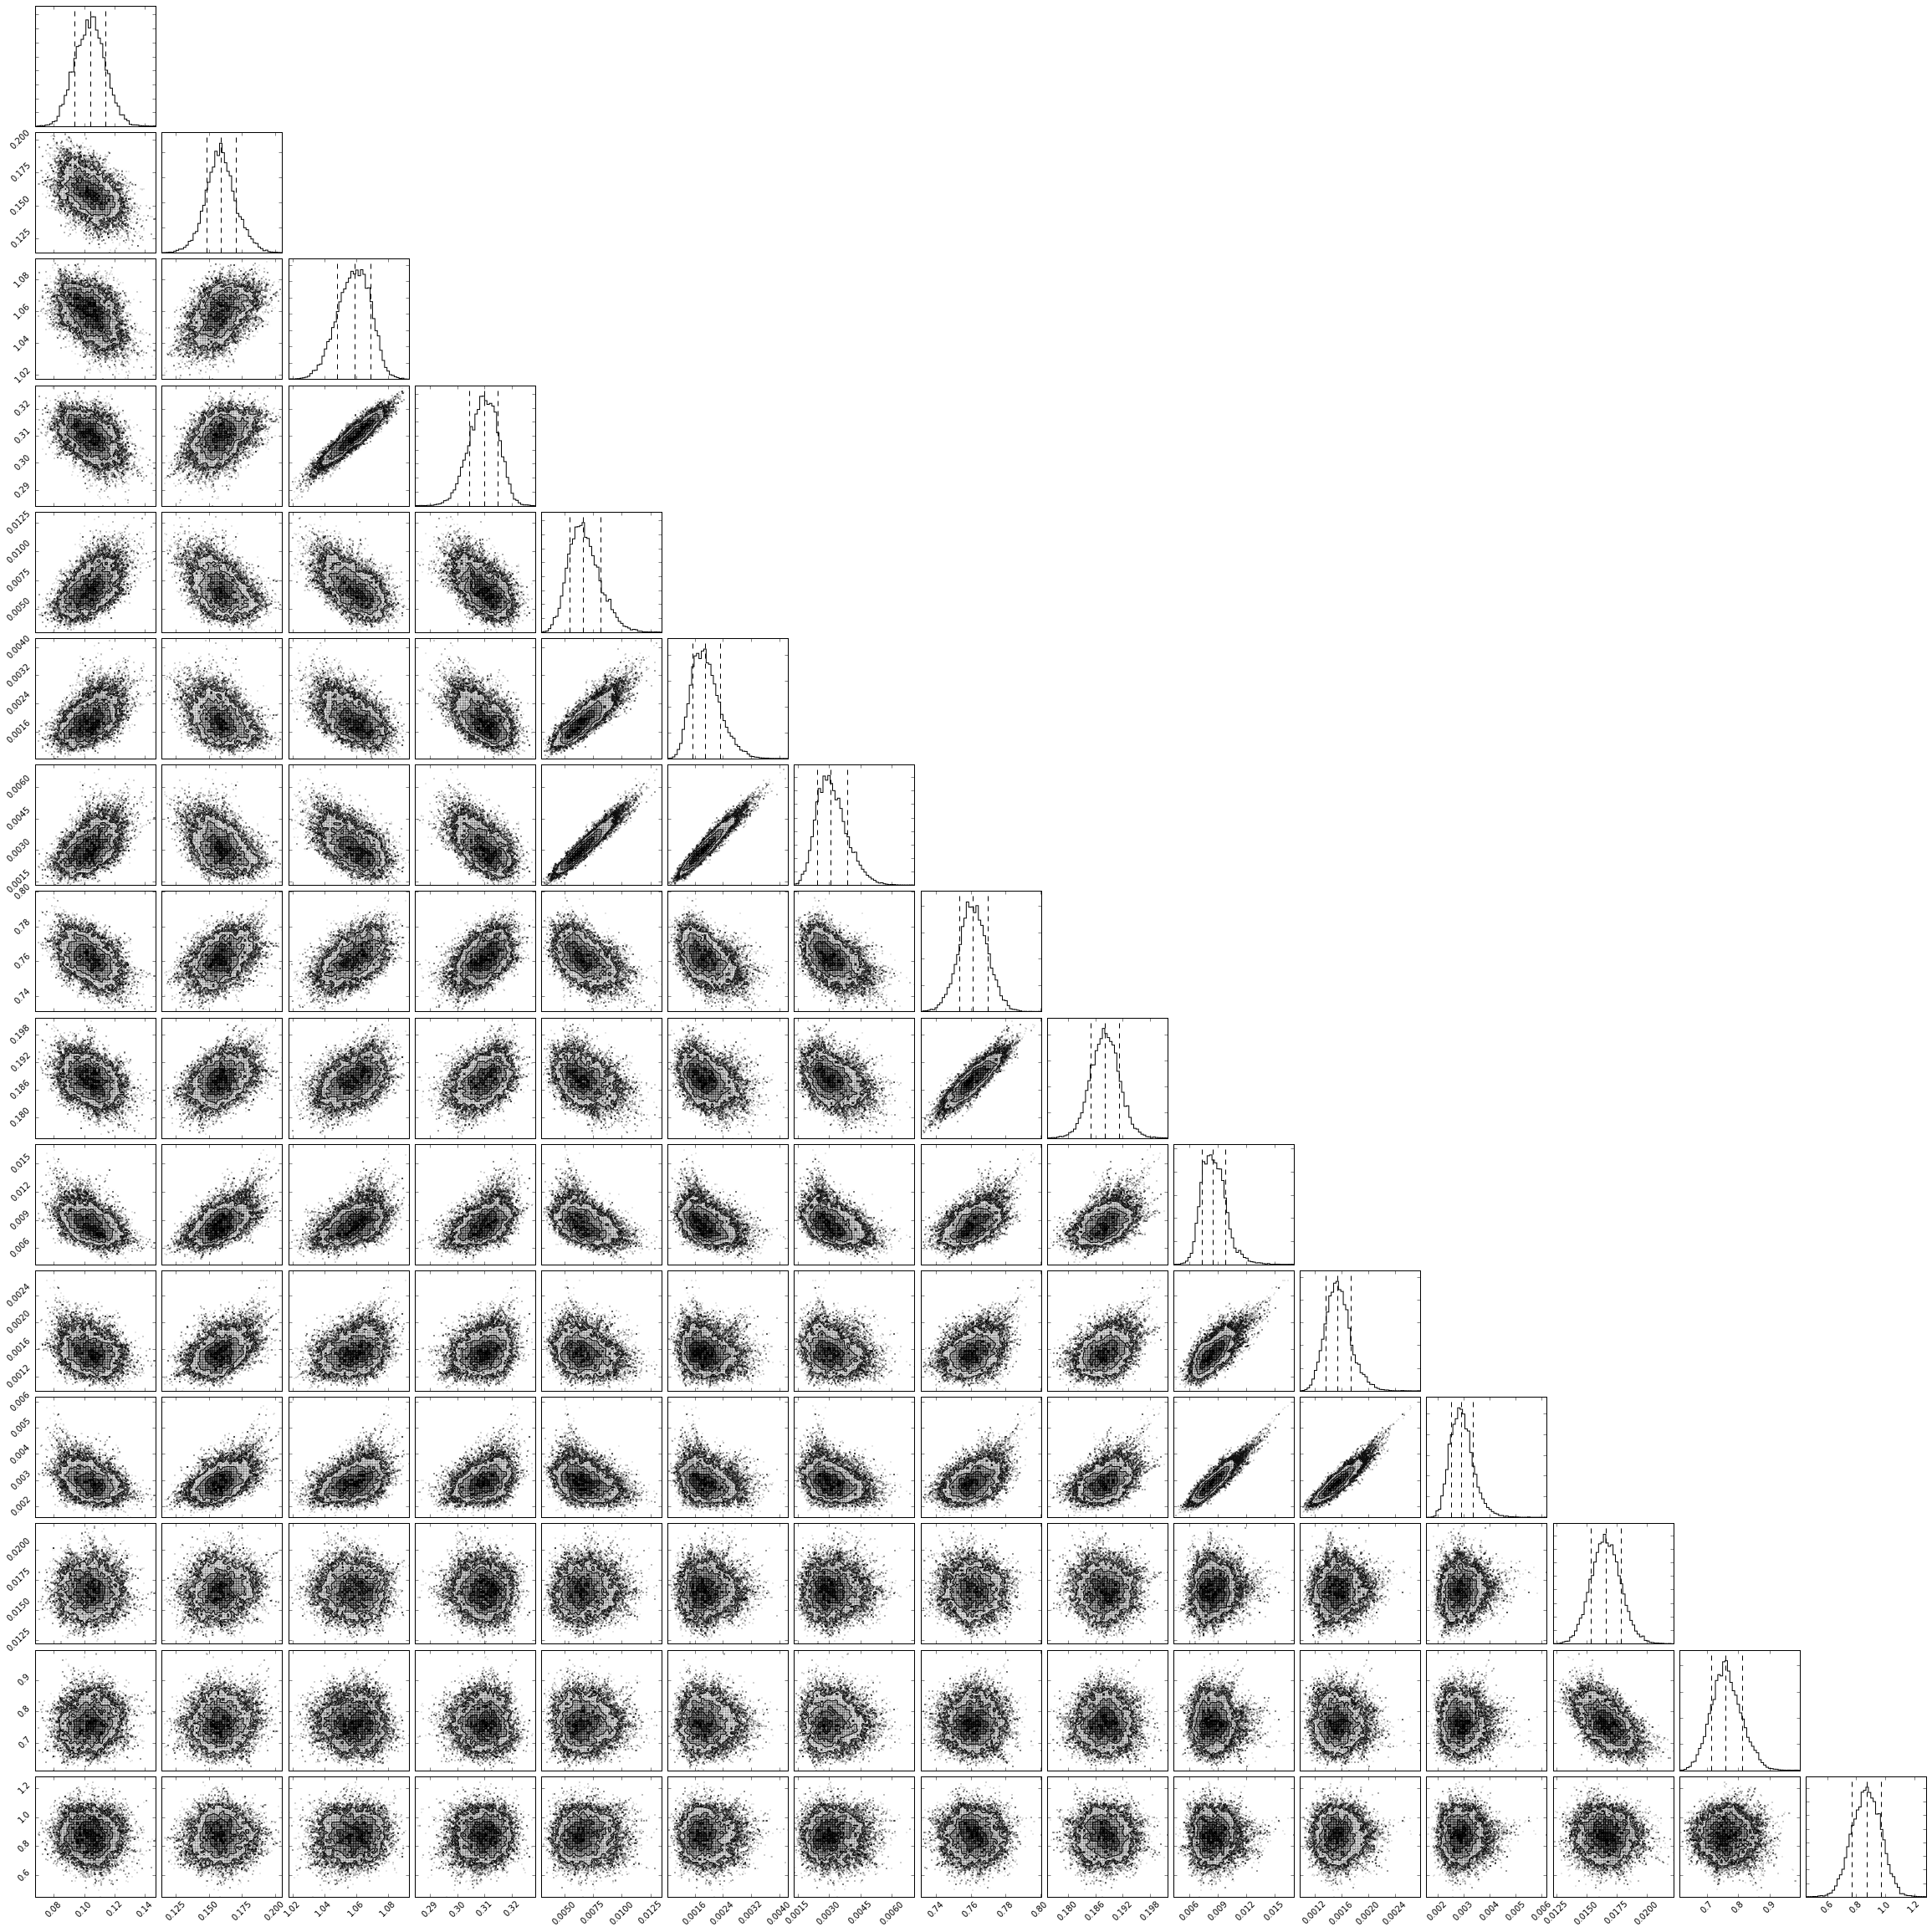

In [192]:
fig = triangle.corner(sampler.chain.reshape(-1,15),quantiles=[0.16, 0.5, 0.84])#,truths=sampler.theta_init)

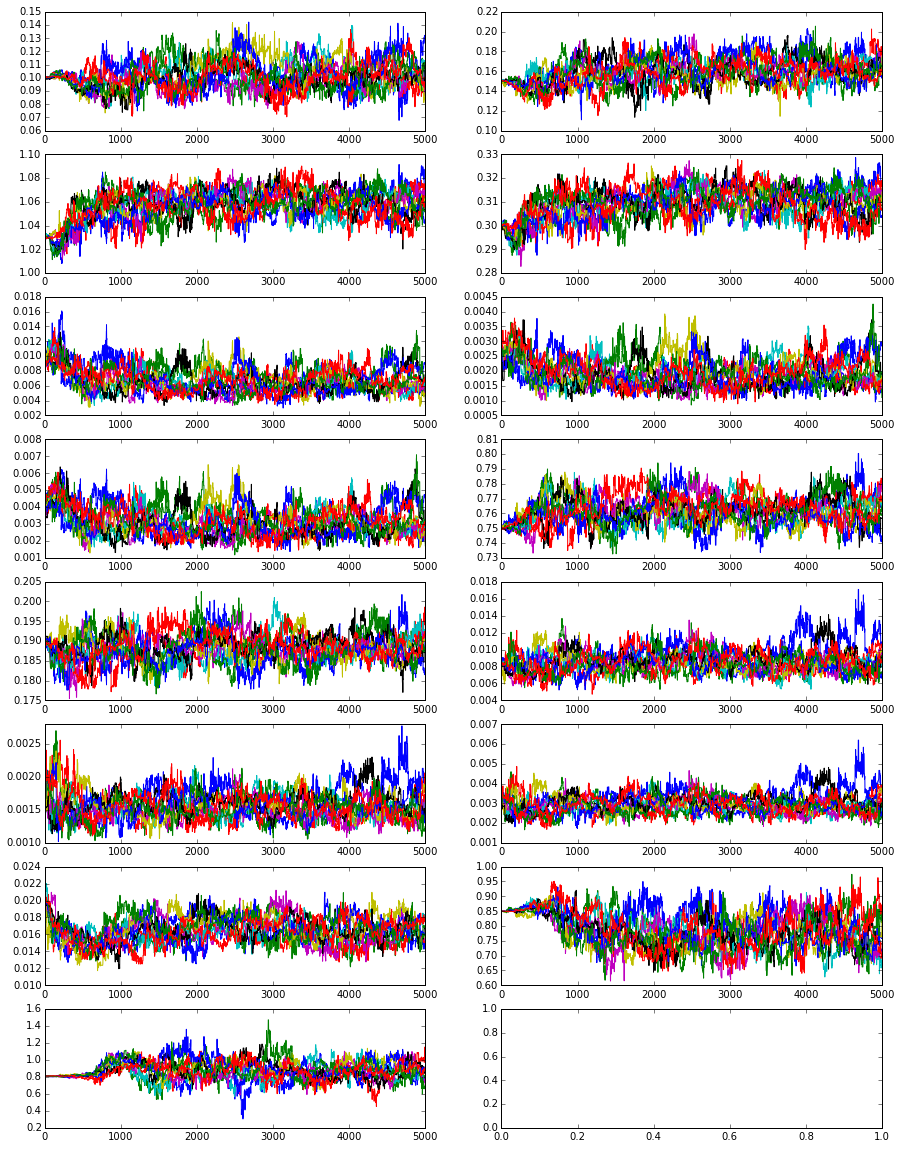

In [193]:
fig,ax = plt.subplots(figsize=(15,20),ncols=2,nrows=8)

for i in range(15):
    for j in range(10):
        ax[i/2,i%2].plot(sampler.sampler.chain[j*3,:,i])

In [190]:
sampler.thetaUnpack(sampler.theta_init)

(array([ 0.1 ,  0.15,  0.75]), array([[ 1.03,  0.3 ],
        [ 0.75,  0.19]]), array([[[ 0.009 ,  0.0042],
         [ 0.0042,  0.0027]],
 
        [[ 0.0082,  0.0031],
         [ 0.0031,  0.0018]]]), array([ 0.02,  0.85,  0.81]))

(-0.25, 1.5)

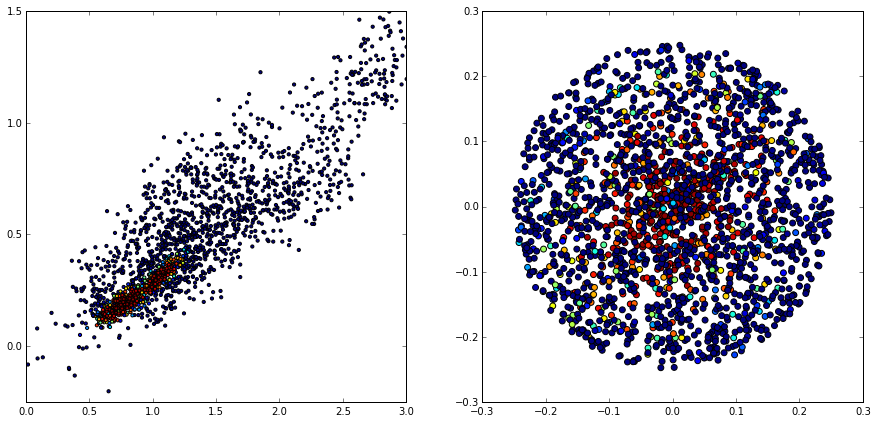

In [196]:
gi = sampler.data[0][:,0]
ri = sampler.data[0][:,1]

x = sampler.data[1][:,0]
y = sampler.data[1][:,1]

fix,ax = plt.subplots(figsize=(15,7),ncols=2)

#ax.set_xlim([-10,10])
#ax.set_ylim([-10,10])
#gcLike = gc.lnLike(sampler.data)
#fgLike = fg.lnLike(sampler.data)

gcs = sampler.p_gc > 0.5

ax[1].scatter(x,y,c=sampler.p_gc,s=35)
ax[0].scatter(gi[::-1],ri[::-1],c=sampler.p_gc[::-1],s=10)
ax[0].set_xlim(0.0,3.0)
ax[0].set_ylim(-0.25,1.5)

(235, 2)

In [53]:
test_data = gcSampler.readTestData()
mock_fg_color,mock_fg_coordinates = sampler.fg.genMock(n=1000)

In [57]:
print mock_fg_color.shape
print test_data[0].shape

(1000, 2)
(235, 2)


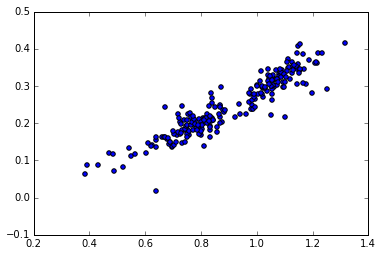

In [42]:
plt.scatter(test_data[0][:,0],test_data[0][:,1])